# 🧾 EDA Summary in Python (IEEE-CIS Fraud Detection)

This notebook presents a lightweight version of the Exploratory Data Analysis (EDA) for the [IEEE-CIS Fraud Detection](https://www.kaggle.com/competitions/ieee-fraud-detection/data?select=train_transaction.csv) dataset. It replicates key steps from the R-based analysis using Python libraries for compatibility and reproducibility.

We focus on:
- Loading and merging data
- Basic data structure exploration
- Class imbalance analysis
- Selected visualizations

Our objective is to show key insights to stakeholders, a deep analysis is made in R in the [notebook .Rmd](./01_EDA_in_R.Rmd) of the notebooks folders in this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load and Merge Data

In [5]:
transactions = pd.read_csv("../data/ieee-fraud-detection/train_transaction.csv")
identity = pd.read_csv("../data/ieee-fraud-detection/train_identity.csv")
train_data = transactions.merge(identity, on="TransactionID", how="left")
print(train_data.shape)

(590540, 434)


# 2. Dataset Overview (shape, missing values, basic info)

In [8]:
print(train_data.shape)
print(train_data.info())
print(train_data.isnull().mean().sort_values(ascending=False).head(10))

(590540, 434)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB
None
id_24    0.991962
id_25    0.991310
id_07    0.991271
id_08    0.991271
id_21    0.991264
id_26    0.991257
id_27    0.991247
id_23    0.991247
id_22    0.991247
dist2    0.936284
dtype: float64


## 3. Target Variable Distribution

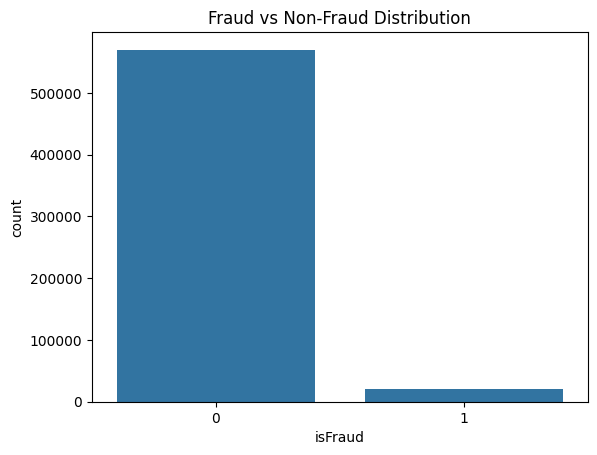

Fraud Rate: 3.50%


In [3]:
sns.countplot(x="isFraud", data=train_data)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

fraud_ratio = train_data["isFraud"].mean()
print(f"Fraud Rate: {fraud_ratio:.2%}")

## 4. Transaction Amount Distribution (log scale)

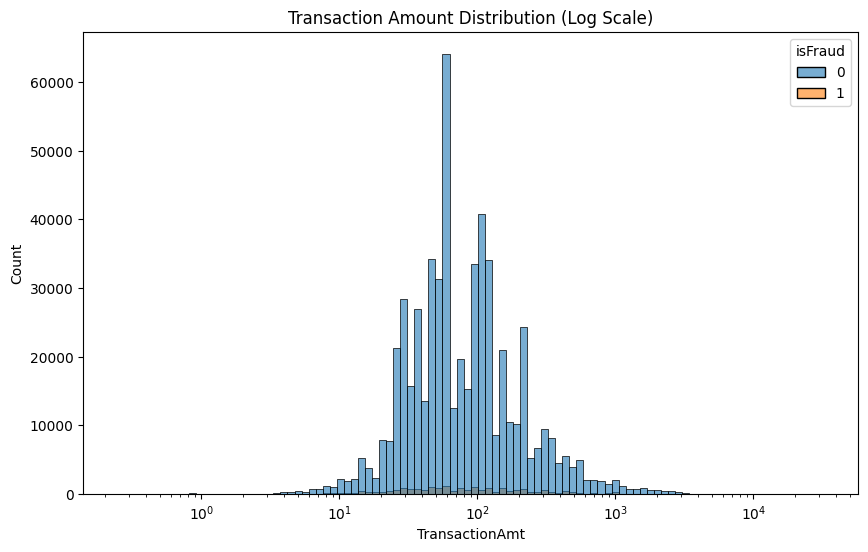

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_data, x="TransactionAmt", hue="isFraud", bins=100, log_scale=(True, False), alpha=0.6)
plt.title("Transaction Amount Distribution (Log Scale)")
plt.show()

## 5. Temporal Pattern (summary)

<Axes: xlabel='TransactionHour', ylabel='Probability'>

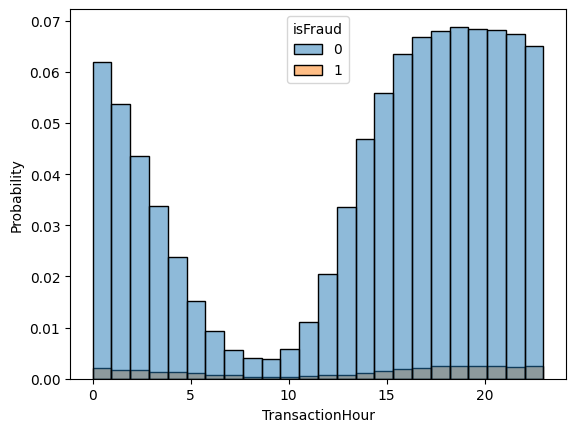

In [11]:
train_data['TransactionHour'] = (train_data['TransactionDT'] // 3600) % 24
sns.histplot(data=train_data, x='TransactionHour', hue='isFraud', stat='probability', bins=24)

## 6. Categorical Feature Insight

## 7. Final Remarks

**Conclusions**: